In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 6.2 Measurement of the current-voltage characteristic

 Here we measured the current-voltage characteristic in 10V steps, in order to determine the depletion voltage and see if it agrees with the value that is stated by the manufacturer, $U_{dep} \approx (60 - 80)V.$

In [2]:
# We read the data from the Excel file
CVC_data = pd.read_excel("/Users/rianashaba/Documents/IMAPP/PP Lab/SiliconStrip/Koenriana/Silicon strip voltage current.xlsx", engine="openpyxl")

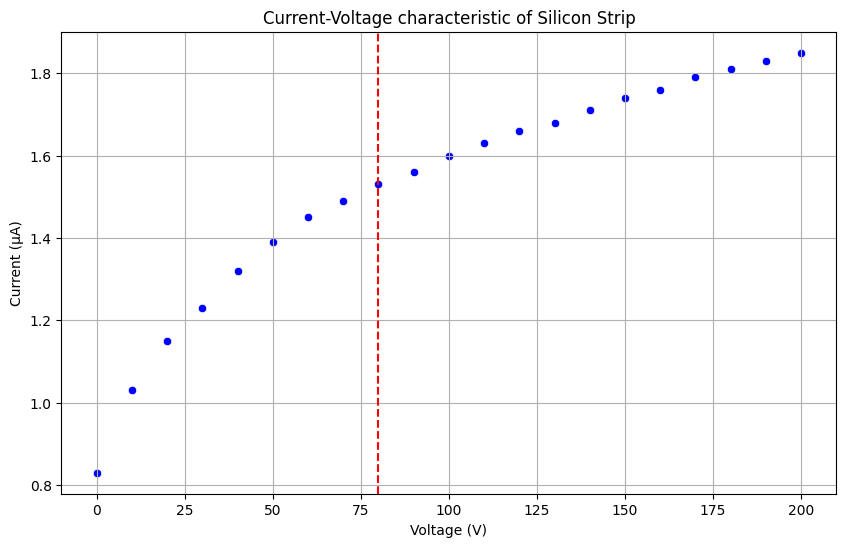

In [3]:
# We plot the data using seaborn scatterplot and matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(data=CVC_data, x="Voltage (V)", y="Current (microA)", color="blue", alpha=1)
plt.title("Current-Voltage characteristic of Silicon Strip")
plt.xlabel("Voltage (V)")
plt.axvline(x=80, color='red', linestyle='--', label='80 V')
plt.ylabel(r"Current (µA)")
plt.grid()
plt.show()

We estimate the depletion voltage by looking at the point where the curve is flattening, and we can see that this happens at around 80V.  
So our depletion voltage is $U_{dep} = 80V$.

## 6.3 Pedestals and noise
In this section we performed a Pedestal Run for 1000 events.

#### a) Plot an overview of the pedestals and noise for each strip

In [4]:
# We read the data from the Pedestal.txt file, using ";" to separate the columns and no header so that the first row is treated as data
Pedestals_data = pd.read_csv("/Users/rianashaba/Documents/IMAPP/PP Lab/SiliconStrip/Koenriana/Pedestal.txt", sep=";", header=None)

In [5]:
Pedestals_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,511.0,510.0,513.0,502.0,507.0,508.0,523.0,521.0,512.0,510.0,...,515.0,504.0,522.0,514.0,519.0,517.0,517.0,515.0,519.0,505.0
1,514.0,504.0,509.0,497.0,514.0,511.0,519.0,509.0,508.0,501.0,...,509.0,505.0,508.0,508.0,520.0,514.0,517.0,503.0,518.0,499.0
2,506.0,502.0,518.0,510.0,515.0,502.0,515.0,515.0,507.0,490.0,...,515.0,515.0,509.0,516.0,507.0,514.0,508.0,501.0,503.0,513.0
3,511.0,515.0,512.0,512.0,515.0,525.0,518.0,509.0,518.0,509.0,...,512.0,508.0,512.0,515.0,523.0,510.0,515.0,516.0,522.0,510.0
4,507.0,511.0,500.0,505.0,509.0,503.0,518.0,513.0,514.0,513.0,...,506.0,501.0,515.0,504.0,506.0,509.0,510.0,512.0,509.0,509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,514.0,501.0,505.0,505.0,508.0,507.0,514.0,518.0,511.0,503.0,...,510.0,511.0,524.0,504.0,519.0,508.0,517.0,508.0,508.0,505.0
124,505.0,513.0,498.0,510.0,509.0,496.0,511.0,519.0,498.0,496.0,...,504.0,499.0,524.0,514.0,511.0,515.0,508.0,511.0,519.0,503.0
125,506.0,507.0,497.0,514.0,519.0,507.0,517.0,511.0,509.0,512.0,...,513.0,501.0,517.0,504.0,510.0,507.0,519.0,495.0,499.0,509.0
126,502.0,500.0,496.0,504.0,506.0,513.0,509.0,517.0,513.0,502.0,...,510.0,508.0,507.0,510.0,515.0,515.0,520.0,498.0,500.0,496.0


In [6]:
# We transpose the DataFrame to get a column for each strip
Pedestals_data = Pedestals_data.T 

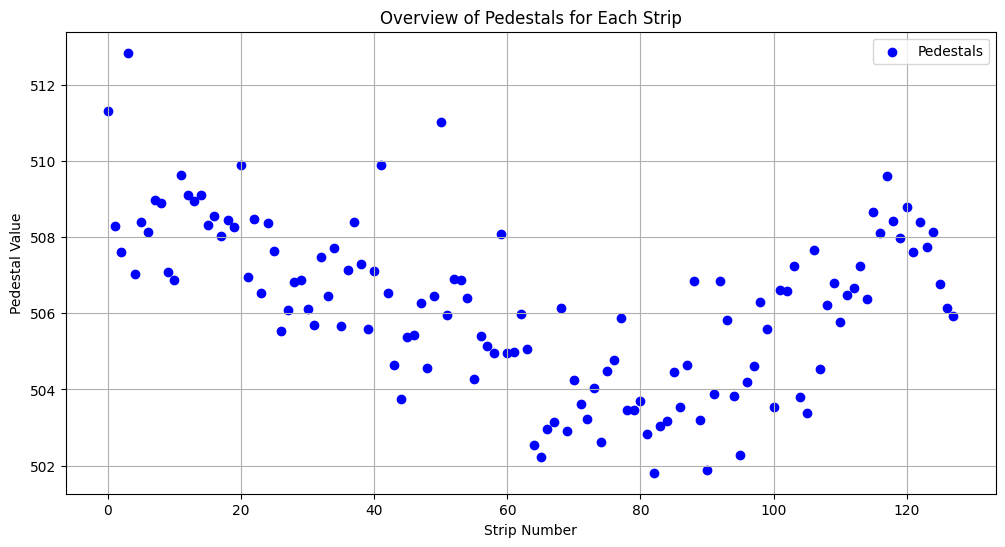

In [7]:
# We calculate the mean for each strip
pedestal = Pedestals_data.mean()

# We plot the pedestal values for each strip
plt.figure(figsize=(12, 6))
plt.scatter(range(len(pedestal)), pedestal, color="blue", alpha=1, label='Pedestals')
plt.title("Overview of Pedestals for Each Strip")
plt.xlabel("Strip Number")
plt.ylabel("Pedestal Value")
plt.legend(loc="upper right")
plt.grid()
plt.show()

To plot the noise for each stip we will first need to calculate the Common Mode Shift, which describes a global disturbance affecting all strips during an event.   
The formula for the Common Mode shift is as follows:  
$$
D(k) = \frac{1}{128}\sum_{i=1}^{128} (ADC(i,k) - P(i))
$$  
where $ADC(i,k)$ is the measured count that arises for a signal $k$ at strip $i$, and $P(i)$ is the pedestal.

In [8]:
# We calculate the Common Mode Shift according to the formula
Common_Mode_Shift = 1/128 * np.sum(Pedestals_data - pedestal, axis=0)  

Now we can calculate the noise of each strip by taking the RMS of the ADC counts after substracting the pedestal and common mode shifts, as shown in the following formula:  
$$
Noise(i) = \sqrt{\frac{1}{N-1}\sum_{k=1}^{N} (ADC(i,k) - P(i) - D(k))^{2}}
$$

In [9]:
# We calculate the Noise according to the formula. N is the number of all events
N = len(Pedestals_data) 
Noise = np.sqrt(1/(N-1) * np.sum((Pedestals_data - pedestal - Common_Mode_Shift)**2, axis=0))  # Calculate noise for each strip

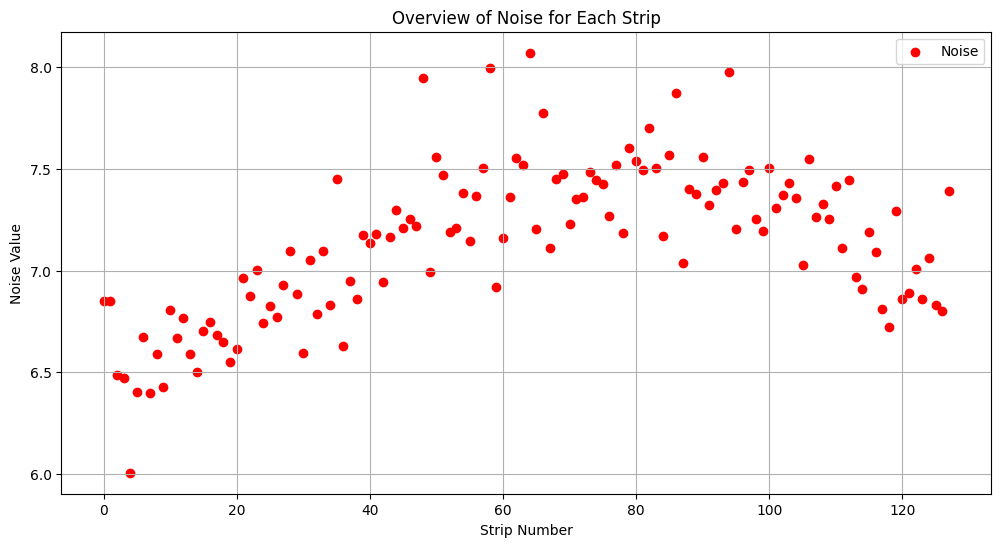

In [10]:
# We plot the Noise value for each strip
plt.figure(figsize=(12, 6))
plt.scatter(range(len(Noise)), Noise, color="red", alpha=1, label='Noise')
plt.xlabel("Strip Number")
plt.ylabel("Noise Value")
plt.title("Overview of Noise for Each Strip")
plt.legend(loc="upper right")
plt.grid()
plt.show()

#### b) Graphically represent the values of the Common Mode in a meaningful way.

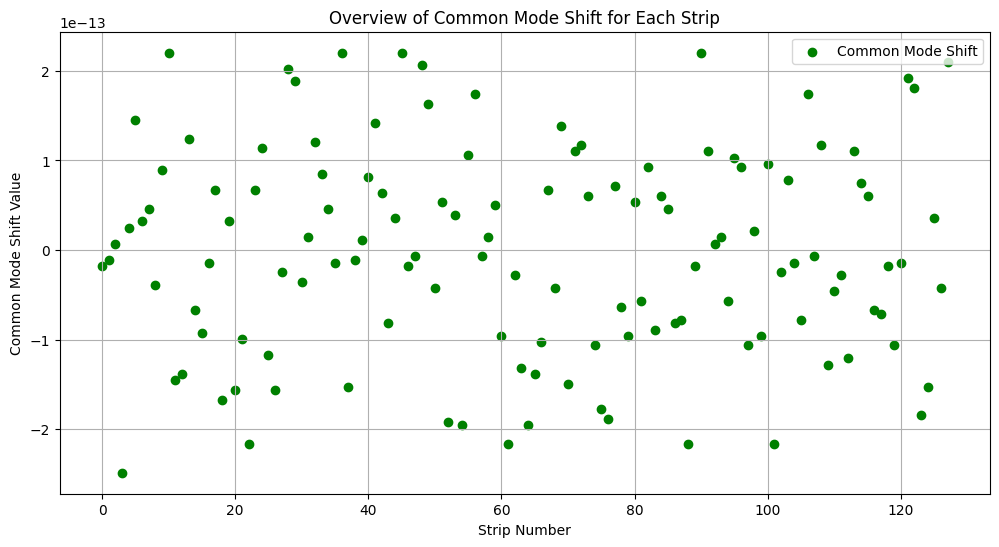

In [11]:
# We plot the Common Mode Shift values for each strip
plt.figure(figsize=(12, 6))
plt.scatter(range(len(Common_Mode_Shift)), Common_Mode_Shift, color="green", alpha=1, label='Common Mode Shift')
plt.xlabel("Strip Number")
plt.ylabel("Common Mode Shift Value")
plt.title("Overview of Common Mode Shift for Each Strip")
plt.legend(loc='upper right')
plt.grid()
plt.show()

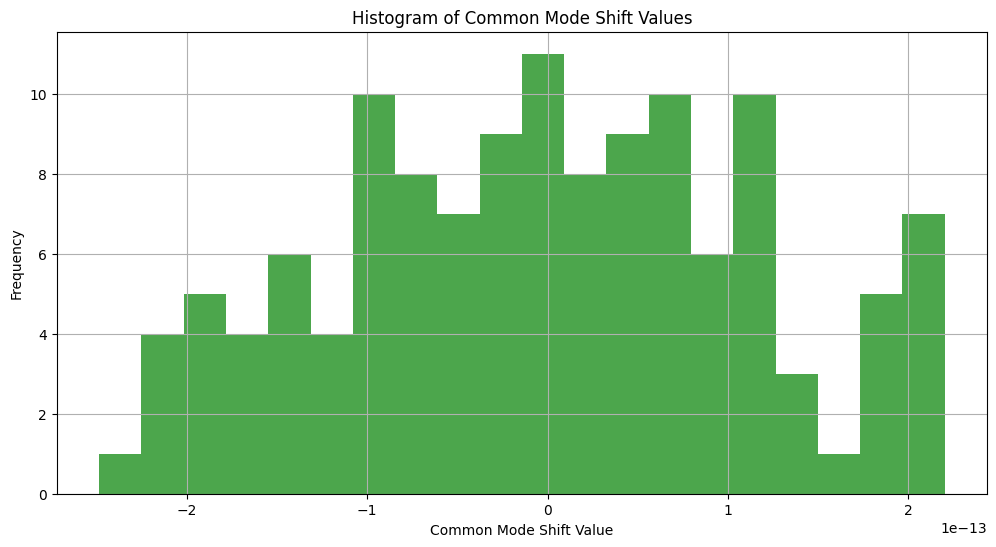

In [12]:
# We also plot this as a histogram
plt.figure(figsize=(12, 6))
plt.hist(Common_Mode_Shift, bins=20, color="green", alpha=0.7)
plt.xlabel("Common Mode Shift Value")
plt.ylabel("Frequency")
plt.title("Histogram of Common Mode Shift Values")
plt.grid()
plt.show()

## Calibration measurements

#### a) Determine the optimum delay with a $\textit{Delay measurement}$ in the $\textit{Calibration Run}$ and enter the value in the Calibration window.  
We determined a delay value of 65ns.

#### b) Record a calibration curve for five channels with the bias voltage above the depletion voltage. For one channel, additionally record a curve at a bias voltage of 0V.  
For this task we applied a bias voltage of 80V, according to the reasoning in section 6.2.

#### b.1) Plot the measured values of the $\textit{Calibration Runs}$ and their mean values.

In [13]:
# We make a function to read and plot the calibration data
def plot_calib(file_name):
    calib_data = pd.read_csv(file_name, skiprows=1, sep="\t")
    calib_data.columns = ["Charge (e-)", "ADC Counts"]
    calib_data["Charge (e-)"] = calib_data["Charge (e-)"].str.replace(',', '.').astype(float) # Convert comma decimals to dots, then to float
    calib_data["ADC Counts"] = calib_data["ADC Counts"].str.replace(',', '.').astype(float)
    mean = calib_data["ADC Counts"].mean()
    std = calib_data["ADC Counts"].std()
    sns.scatterplot(data=calib_data, x="ADC Counts", y="Charge (e-)", color="blue", alpha=1, label=f"Mean ADC Counts µ: {mean:.2f}, $\sigma$: {std:.2f}")
    plt.title(f"Calibration Data for {file_name[16:-4]}") 
    plt.xlabel("ADC Counts")
    plt.ylabel("Charge (e-)")
    plt.show()

In [14]:
calib_folder = "Calib"

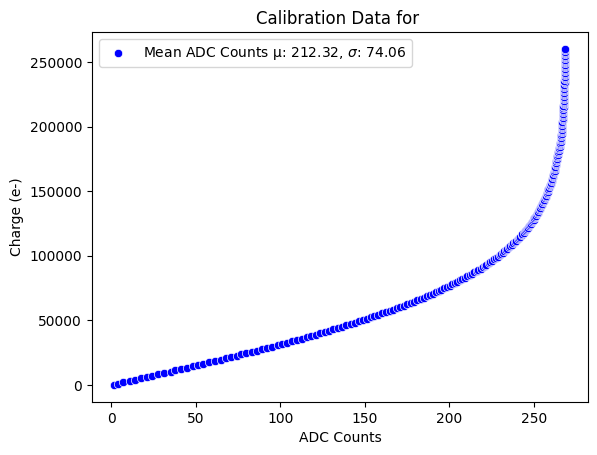

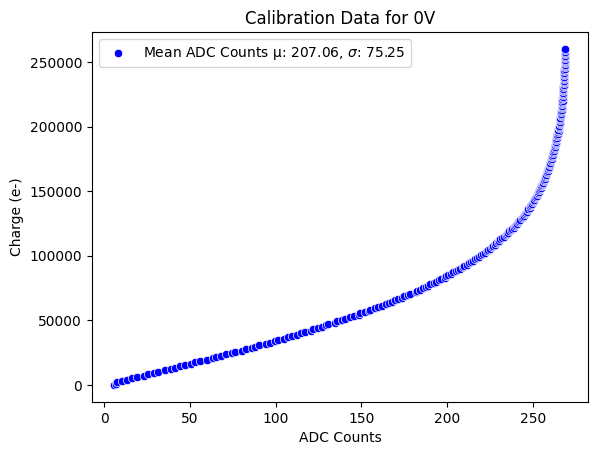

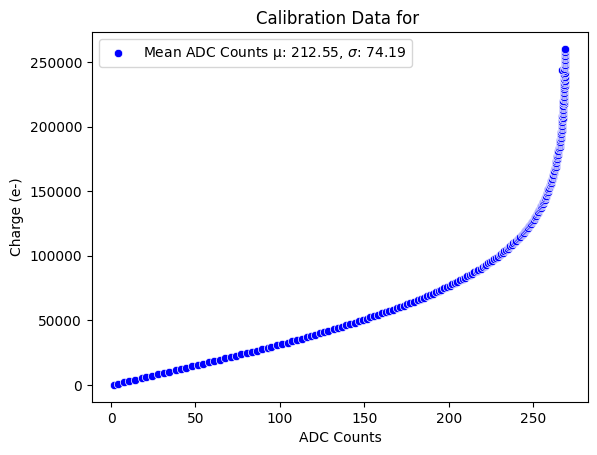

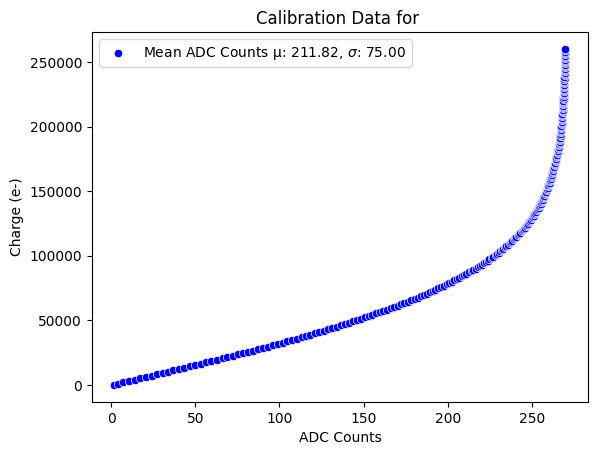

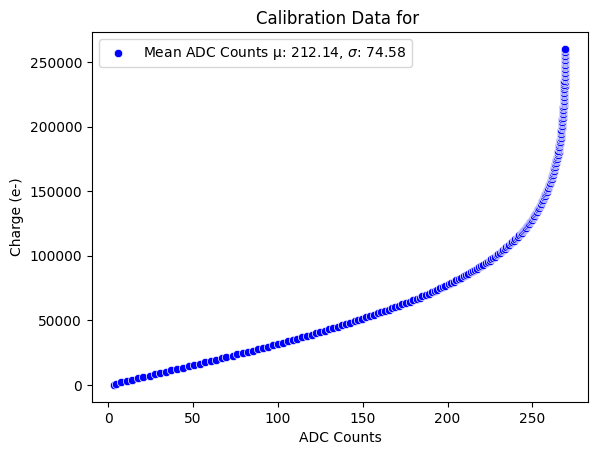

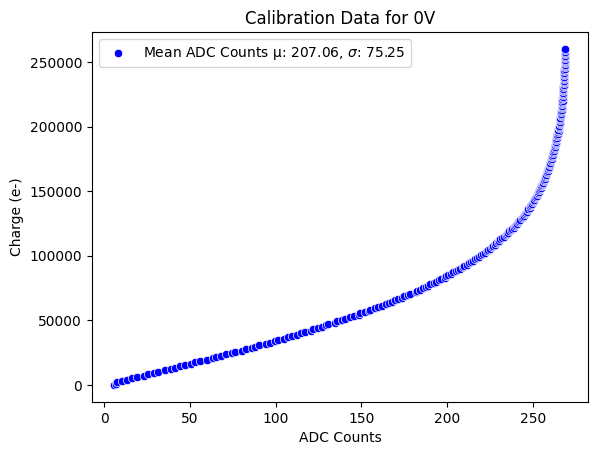

In [15]:
import os

# Iterate through all files in the calibration folder
for file in os.listdir(calib_folder)[:-1]:
    if file.endswith(".txt"):  # Process only .txt files
        file_path = os.path.join(calib_folder, file)
        plot_calib(file_path)

# Plot the calibration data for the 0V file
calib_0V = pd.read_csv("Calib/channel84_0V.txt", skiprows=1, sep="\t")  
calib_0V.columns = ["Charge (e-)", "ADC Counts"]
calib_0V["Charge (e-)"] = calib_0V["Charge (e-)"].str.replace(',', '.').astype(float) # Convert comma decimals to dots, then to float
calib_0V["ADC Counts"] = calib_0V["ADC Counts"].str.replace(',', '.').astype(float)
mean_0V = calib_0V["ADC Counts"].mean()
std_0V = calib_0V["ADC Counts"].std()
sns.scatterplot(data=calib_0V, x="ADC Counts", y="Charge (e-)", color="blue", alpha=1, label=f"Mean ADC Counts µ: {mean_0V:.2f}, $\sigma$: {std_0V:.2f}")
plt.title("Calibration Data for 0V")
plt.xlabel("ADC Counts")
plt.ylabel("Charge (e-)")
plt.show()

#### b.2) Determine the dependence of the injected charge on the measured ADC values with a 4th degree polynomial.

In [16]:
from numpy import polyfit, polyval

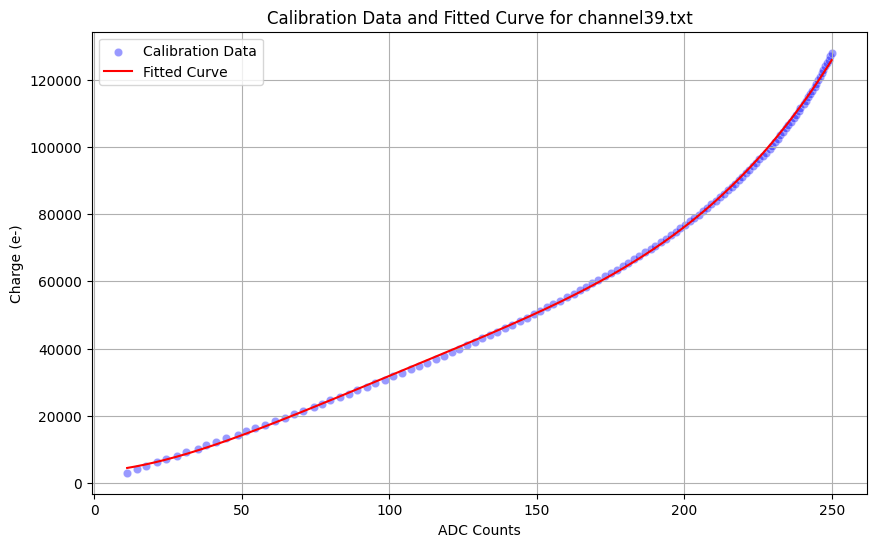

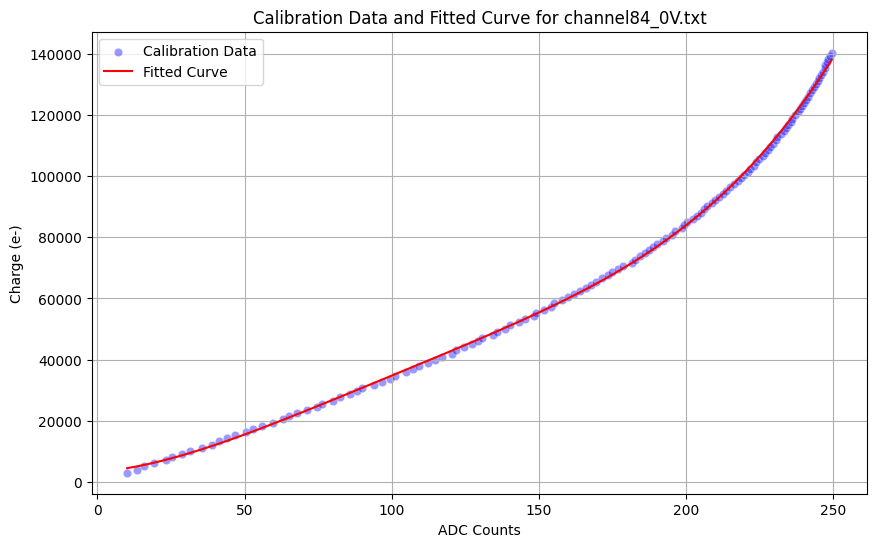

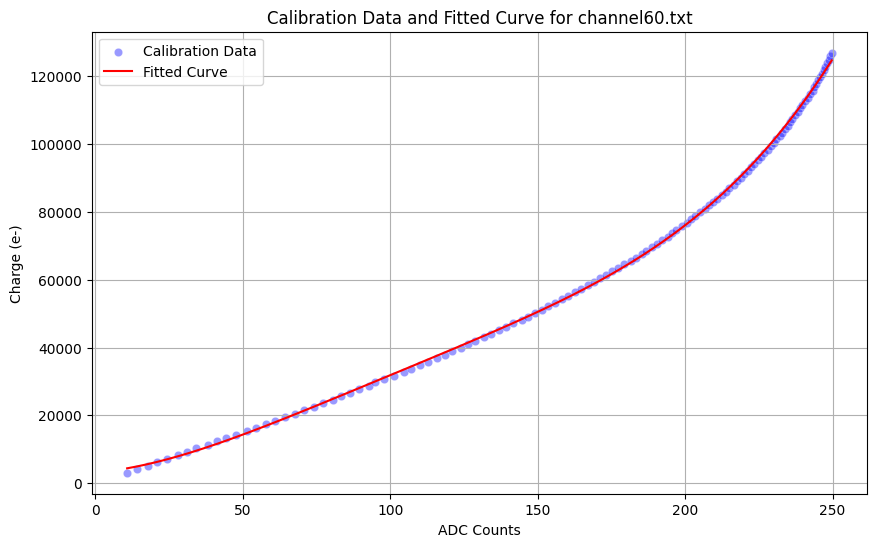

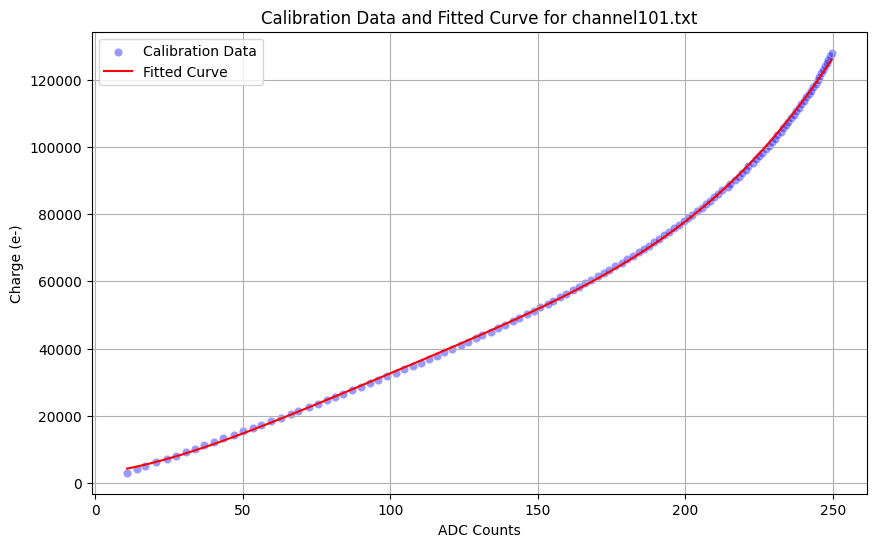

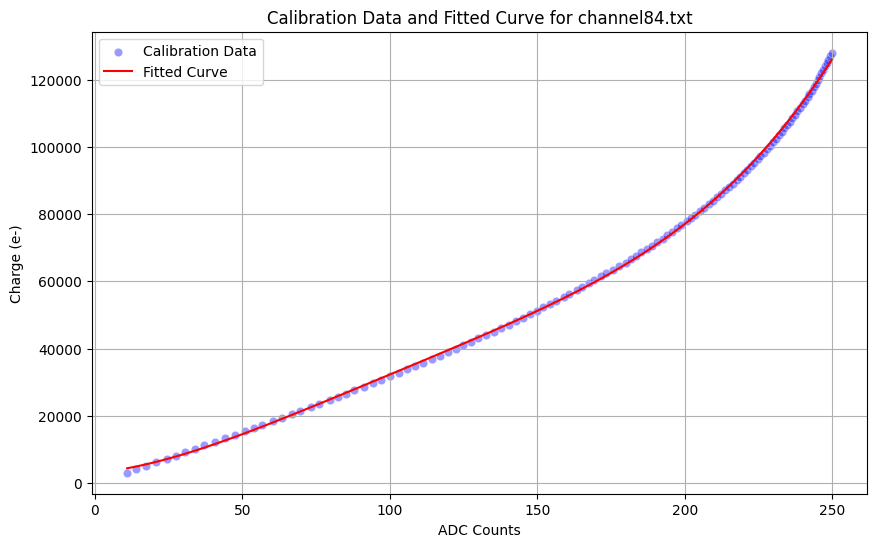

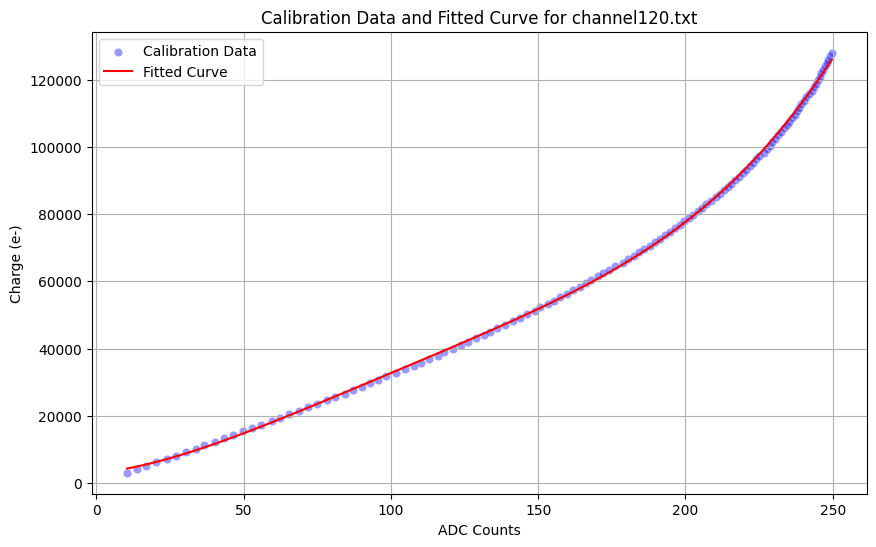

Coefficients for file: channel39.txt, Coefficients: [ 7.64820488e-05 -3.05445751e-02  4.59971945e+00  5.41158249e+01
  3.35417220e+03]
Coefficients for file: channel84_0V.txt, Coefficients: [ 8.04043648e-05 -3.16157905e-02  4.73864204e+00  7.61949627e+01
  3.34307358e+03]
Coefficients for file: channel60.txt, Coefficients: [ 7.27156900e-05 -2.87431444e-02  4.31017490e+00  7.06128571e+01
  3.13951774e+03]
Coefficients for file: channel101.txt, Coefficients: [ 6.84863545e-05 -2.67936287e-02  4.01372302e+00  9.61065999e+01
  2.83298406e+03]
Coefficients for file: channel84.txt, Coefficients: [ 7.14161880e-05 -2.81375450e-02  4.22128166e+00  7.99869014e+01
  3.04220885e+03]
Coefficients for file: channel120.txt, Coefficients: [ 6.98939404e-05 -2.74616826e-02  4.10442556e+00  9.20946004e+01
  2.92986651e+03]


In [17]:
# Make a dictionary to store the coefficients for each file
file_coefficients = {}

# Iterate through all files in the calibration folder
for file in os.listdir(calib_folder):
    if file.endswith(".txt"):  # Process only .txt files
        file_path = os.path.join(calib_folder, file)
        
        # Read the calibration data
        calib_data = pd.read_csv(file_path, skiprows=1, sep="\t")
        calib_data.columns = ["Charge (e-)", "ADC Counts"]
        calib_data["Charge (e-)"] = calib_data["Charge (e-)"].str.replace(',', '.').astype(float)  # Convert to float
        calib_data["ADC Counts"] = calib_data["ADC Counts"].str.replace(',', '.').astype(float)

        # Constrain the data to the range of interest (100-250 ADC counts)
        calib_data_middle = calib_data[(calib_data["ADC Counts"] >= 10) & (calib_data["ADC Counts"] <= 250)]
        
        # Fit a fourth-degree polynomial
        coeffs = polyfit(calib_data_middle["ADC Counts"], calib_data_middle["Charge (e-)"], 4)
        
        # Store the coefficients
        file_coefficients[file] = coeffs
        
        # Generate fitted curve
        x_fit = np.linspace(calib_data_middle["ADC Counts"].min(), calib_data_middle["ADC Counts"].max(), 500)
        y_fit = polyval(coeffs, x_fit)
        
        # Plot the data and the fitted curve
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=calib_data_middle, x="ADC Counts", y="Charge (e-)", label="Calibration Data", color="blue", alpha=0.4)
        plt.plot(x_fit, y_fit, color='red', alpha=1, label="Fitted Curve")
        plt.title(f"Calibration Data and Fitted Curve for {file}")
        plt.xlabel("ADC Counts")
        plt.ylabel("Charge (e-)")
        plt.legend(loc="upper left")
        plt.grid()
        plt.show()

# Display the coefficients for each file
for file, coeffs in file_coefficients.items():
    print(f"Coefficients for file: {file}, Coefficients: {coeffs}")


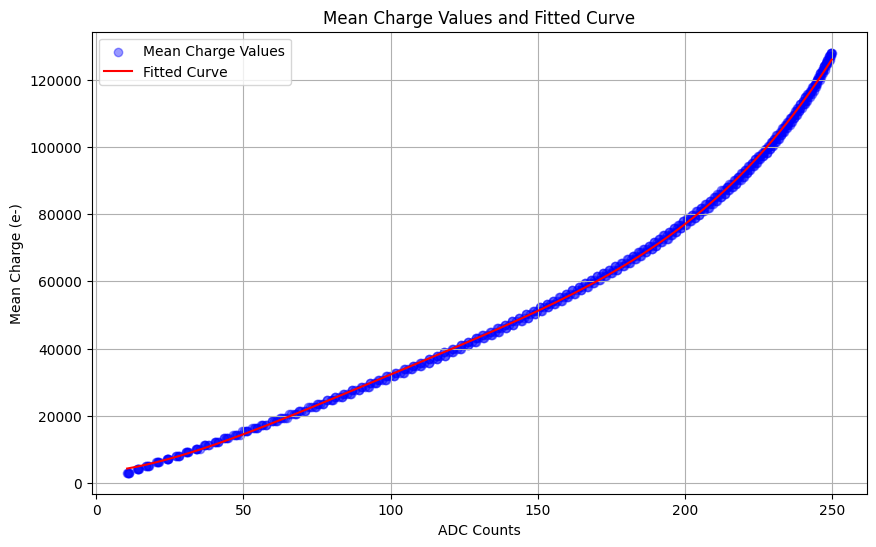

Coefficients for the mean fit: [ 7.17221941e-05 -2.83001788e-02  4.24399149e+00  7.89774315e+01
  3.05419756e+03]


In [18]:
# Make a dictionary to store ADC values for each charge across all files
charge_adc_values = {}

# Iterate through all files in the calibration folder
for file in os.listdir(calib_folder):
    if file.endswith(".txt"):  # Process only .txt files
        if file.endswith("0V.txt"): # Skip the 0V file for this analysis
            continue
        file_path = os.path.join(calib_folder, file)
        
        # Read the file
        data = pd.read_csv(file_path, skiprows=2, sep="\t", header=None)
        data.columns = ["Charge (e-)", "ADC Counts"]
        data["Charge (e-)"] = data["Charge (e-)"].str.replace(',', '.').astype(float)
        data["ADC Counts"] = data["ADC Counts"].str.replace(',', '.').astype(float)

        # Constrain the data to the range of interest (100-250 ADC counts)
        data = data[(data["ADC Counts"] >= 10) & (data["ADC Counts"] <= 250)]
        
        # Group by ADC and collect charge values
        for _, row in data.iterrows():
            charge = row["Charge (e-)"]
            adc = row["ADC Counts"]
            
            if adc not in charge_adc_values:
                charge_adc_values[adc] = []
            charge_adc_values[adc].append(charge)

# Calculate the average charge value for each ADC value
mean_charge_per_adc = {adc: np.mean(charges) for adc, charges in charge_adc_values.items()}

# Sort the data by ADC values
adc_sorted = sorted(mean_charge_per_adc.keys())
charges_sorted = [mean_charge_per_adc[adc] for adc in adc_sorted]


# Fit a curve to the mean charge values
coeffs_mean_fit = polyfit(adc_sorted, charges_sorted, 4)
x_fit_mean = np.linspace(min(adc_sorted), max(adc_sorted), 500)
y_fit_mean = polyval(coeffs_mean_fit, x_fit_mean)

# Plot the mean charge values and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(adc_sorted, charges_sorted, color="blue", alpha=0.4, label="Mean Charge Values")
plt.plot(x_fit_mean, y_fit_mean, color='red', alpha=1, label="Fitted Curve")
plt.title("Mean Charge Values and Fitted Curve")
plt.xlabel("ADC Counts")
plt.ylabel("Mean Charge (e-)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

print("Coefficients for the mean fit:", coeffs_mean_fit)

#### b.3) Compare the curve at 0V and above the depletion voltage.

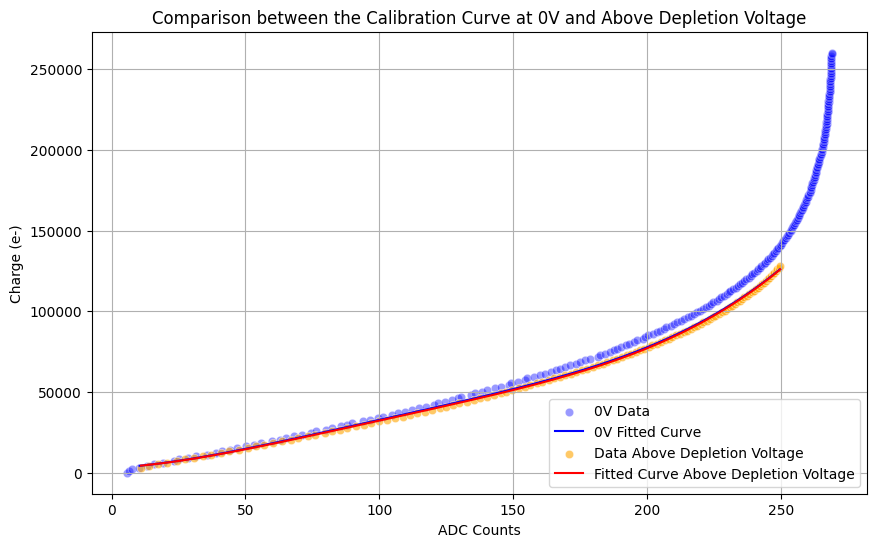

In [19]:
# Plot the calibration data for the 0V file
plt.figure(figsize=(10, 6))
sns.scatterplot(data=calib_0V, x="ADC Counts", y="Charge (e-)", label="0V Data", color="blue", alpha=0.4)

# Plot the fitted curve for 0V
plt.plot(x_fit, y_fit, label="0V Fitted Curve", color="blue", alpha=1)

file_path = "Calib/channel84.txt"

# Load and plot the data for a file above the depletion voltage
calib_above_depletion = pd.read_csv(file_path, skiprows=1, sep="\t")
calib_above_depletion.columns = ["Charge (e-)", "ADC Counts"]
calib_above_depletion["Charge (e-)"] = calib_above_depletion["Charge (e-)"].str.replace(',', '.').astype(float)
calib_above_depletion["ADC Counts"] = calib_above_depletion["ADC Counts"].str.replace(',', '.').astype(float)

# Constrain the data to the range of interest (100-250 ADC counts)
calib_above_depletion = calib_above_depletion[(calib_above_depletion["ADC Counts"] >= 10) & (calib_above_depletion["ADC Counts"] <= 250)]

# Fit a polynomial for the data above the depletion voltage
coeffs_above = polyfit(calib_above_depletion["ADC Counts"], calib_above_depletion["Charge (e-)"], 4)    # Fit a 4th-degree polynomial
x_fit_above = np.linspace(calib_above_depletion["ADC Counts"].min(), calib_above_depletion["ADC Counts"].max(), 500)
y_fit_above = polyval(coeffs_above, x_fit_above)

# Plot the data and fitted curve for the file above the depletion voltage
sns.scatterplot(data=calib_above_depletion, x="ADC Counts", y="Charge (e-)", label="Data Above Depletion Voltage", alpha=0.6, color="orange")
plt.plot(x_fit_above, y_fit_above, label="Fitted Curve Above Depletion Voltage", color="red", alpha=1)

plt.xlabel("ADC Counts")
plt.ylabel("Charge (e-)")
plt.title("Comparison between the Calibration Curve at 0V and Above Depletion Voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 6.5 Measuring the strip sensors by using the laser


#### a) Measure the optimal delay between laser signal and chip readout using the option $\textit{Laser Sync}$.  

We determined an optimal delay of 110ns.

#### c) Plot the signal of relevant strips as a function of the laser position. Determine from this the pitch of the strips and the note the strip numbers.

In [20]:
# Read and load the laser scan data
column_names = [f"Strip {i}" for i in range(1,129)]
Laserscan_data = pd.read_csv("/Users/rianashaba/Documents/IMAPP/PP Lab/SiliconStrip/Koenriana/Laserscan.txt", sep="\t", header=None, names=column_names)

In [21]:
Laserscan_data

,Strip 1,Strip 2,Strip 3,Strip 4,Strip 5,Strip 6,Strip 7,Strip 8,Strip 9,Strip 10,...,Strip 119,Strip 120,Strip 121,Strip 122,Strip 123,Strip 124,Strip 125,Strip 126,Strip 127,Strip 128
0,0.708373,-0.152742,0.064725,-0.072377,-0.202448,-0.323668,-0.059691,-0.448130,-0.218273,0.125191,...,-0.521522,-0.144450,-0.007400,0.272517,0.262740,-0.138220,0.287962,0.099537,0.305941,0.697776
1,0.687525,-0.035728,0.165755,-0.166152,-0.163356,-0.322538,-0.093526,-0.223224,-0.118242,0.163284,...,-0.481432,-0.075388,0.038685,0.255664,0.247886,-0.225002,0.435945,0.148618,0.227151,0.737867
2,0.789847,-0.146193,0.308038,-0.030862,-0.037057,-0.262174,0.035769,-0.303718,-0.056878,0.171701,...,-0.382106,0.100861,0.018131,0.385959,0.257302,-0.011790,0.387419,0.320871,0.215588,0.624406
3,0.862249,0.014121,0.161659,-0.021397,-0.176443,-0.325636,-0.015705,-0.335213,-0.126334,0.139207,...,-0.545468,-0.054509,-0.015361,0.295524,0.256777,-0.164164,0.323956,0.137529,0.190087,0.648855
4,0.737128,-0.008103,0.167407,-0.012652,-0.036829,-0.366841,0.019014,-0.385409,-0.034672,0.122977,...,-0.450809,-0.026783,0.064313,0.416157,0.103683,-0.190384,0.307726,0.138282,0.232798,0.603654
5,0.582425,-0.104864,0.207509,-0.130392,-0.178545,-0.429636,0.010165,-0.325326,-0.126438,0.159083,...,-0.532585,0.032300,0.084435,0.306409,0.187742,-0.090341,0.346830,0.277285,0.132041,0.726674
6,0.661897,-0.063354,0.231036,-0.133838,-0.172999,-0.335179,0.004722,-0.305795,-0.195818,0.118675,...,-0.463103,-0.012104,-0.012917,0.157109,0.008472,-0.146734,0.435292,0.257856,0.173551,0.527424
7,0.636457,-0.168713,0.150652,-0.086350,-0.211426,-0.316662,0.040222,-0.442123,-0.107371,0.124205,...,-0.429601,-0.084497,-0.176218,0.230571,0.113902,-0.148197,0.322940,0.140508,0.071189,0.564922
8,0.518575,-0.184697,0.015787,-0.076360,-0.097540,-0.361617,-0.017720,-0.512053,-0.165313,0.052277,...,-0.622409,-0.003577,-0.047347,0.239562,0.111904,-0.199146,0.319943,0.143505,0.144116,0.508978
9,0.574850,-0.207344,0.020114,-0.130974,-0.191115,-0.436212,-0.238169,-0.475759,-0.270876,0.083576,...,-0.629071,-0.200050,-0.076986,0.205927,0.040306,-0.257757,0.332261,0.037942,0.089501,0.513304


Each row corresponds to the position of the laser at 10µm intervals.

#### To find the relevant strips, we will plot the Mean ADC Values for each strip with respect to the corresponding strip number.

In [22]:
# Find the mean of each strip
mean_per_strip = Laserscan_data.mean(axis=0)

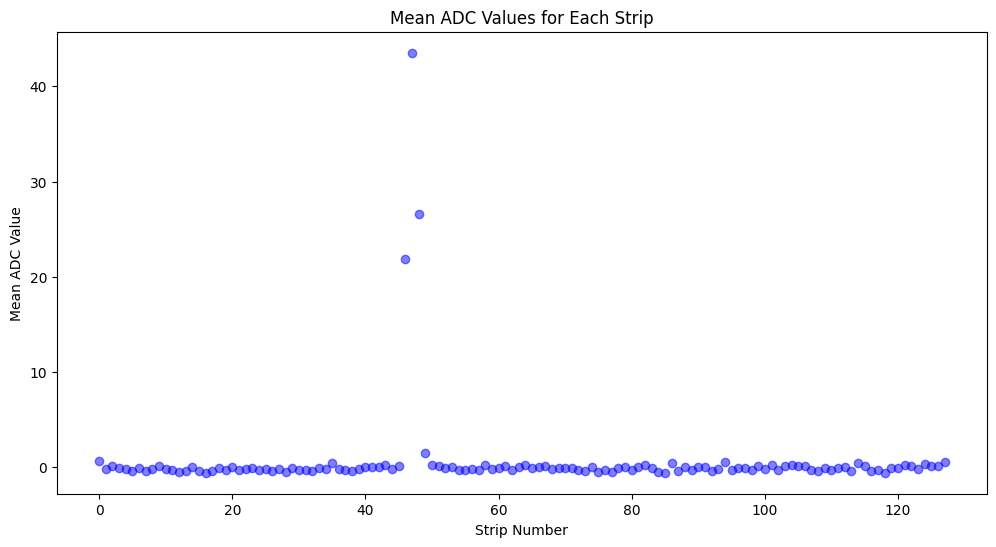

In [23]:
# Plot the mean of each strip and the strip number
plt.figure(figsize=(12,6))
plt.scatter(range(len(mean_per_strip)), mean_per_strip, color="blue", alpha=0.5, label="Mean ADC Values")
plt.xlabel("Strip Number")
plt.ylabel("Mean ADC Value")
plt.title("Mean ADC Values for Each Strip")
plt.show()

In [24]:
# From the plot we can see that the cutoff point if at 10.
# Now we print the index of each relevant strip whose Mean ADC Value is above 10.
relevant_strips = mean_per_strip[mean_per_strip > 10].index
print(relevant_strips)

Index(['Strip 47', 'Strip 48', 'Strip 49'], dtype='object')


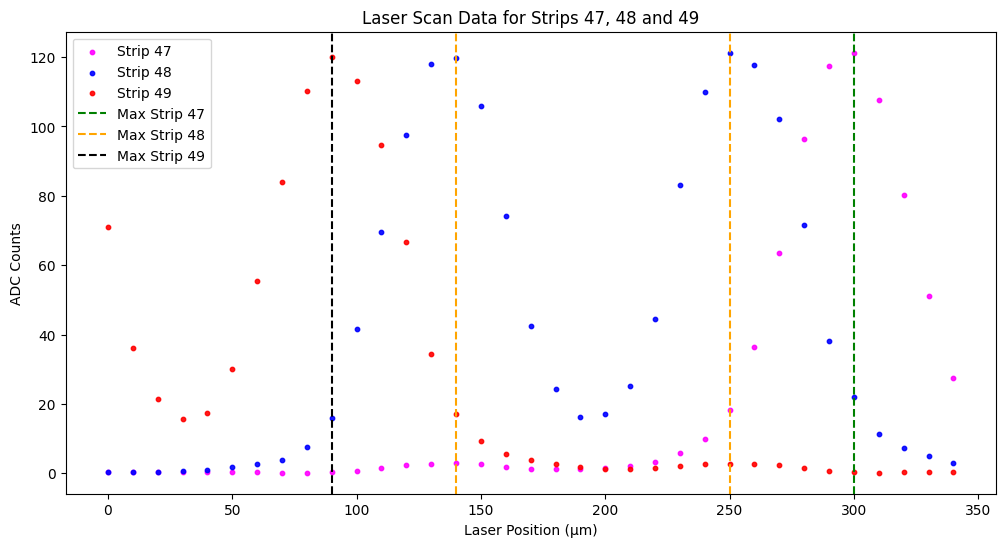

In [25]:
# Plot the data for strips 47, 48 and 49 with respect to the laser position
# We multiply index of the DataFrame by 10 to convert the laser position into µm
plt.figure(figsize=(12,6))
plt.scatter(Laserscan_data.index*10, Laserscan_data["Strip 47"], color="magenta", alpha=0.9, label="Strip 47", s=10) 
plt.scatter(Laserscan_data.index*10, Laserscan_data["Strip 48"], color="blue", alpha=0.9, label="Strip 48", s=10) 
plt.scatter(Laserscan_data.index*10, Laserscan_data["Strip 49"], color="red", alpha=0.9, label="Strip 49", s=10)
# Add a vertical line at the poisition of maximal value for Strip 47
plt.axvline(x=Laserscan_data["Strip 47"].argmax()*10, color='green', linestyle='--', label="Max Strip 47")
# Add a vertical line at the poisition of maximal value for Strip 48
plt.axvline(x=Laserscan_data["Strip 48"].argmax()*10, color="orange", linestyle="--", label="Max Strip 48")
# Add a vertical line at the next maximal value for Strip 48
plt.axvline(x=Laserscan_data["Strip 48"].drop(Laserscan_data["Strip 48"].argmax(), inplace = False).argmax()*10, color='orange', linestyle='--')
# Add a vertical line at the poisition of maximal value for Strip 49
plt.axvline(x=Laserscan_data["Strip 49"].argmax()*10, color="black", linestyle="--", label="Max Strip 49")
plt.xlabel("Laser Position (µm)")
plt.ylabel("ADC Counts")
plt.title("Laser Scan Data for Strips 47, 48 and 49")
plt.legend(loc="upper left")
plt.show()

In [26]:
print(f"The pitch of the strips is {Laserscan_data['Strip 48'].argmax()*10 - Laserscan_data['Strip 49'].argmax()*10}µm.")

The pitch of the strips is 160µm.


## 6.6 Determination of the Charge Collection Efficiency
### Using a laser  
In this section we increased the voltage from 0 to 200V in 10V steps and recorded a dataset of 1000 events for each step.

#### a) Investigate the efficiency of the detector as a function of the applied voltage by measuring one of the maxima from task 6.5 at different bias voltages with the laser in focus. Compare the beginning of the plateau with the depletion voltage determined in task part 6.2.

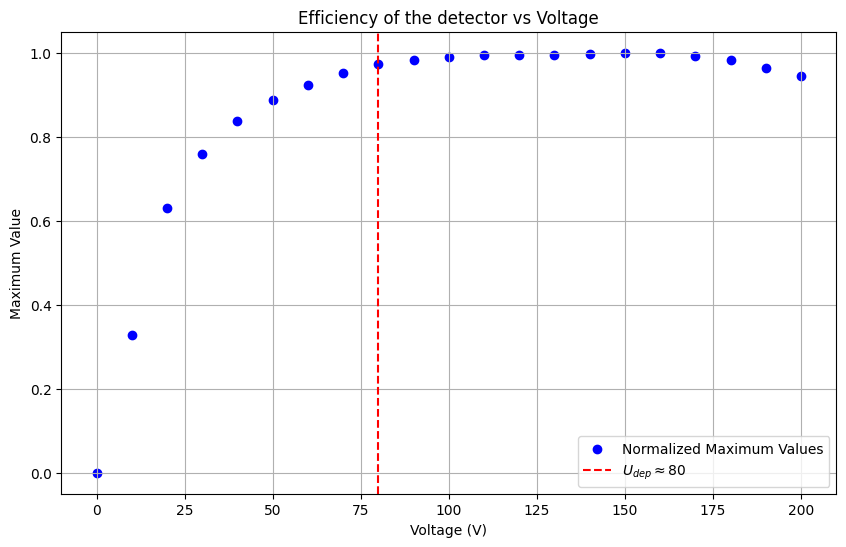

In [27]:
import os

# Folder containing the files
ccel_folder = "CCEL"

# Lists to store the x and y values
voltages = []
sums = []

# Iterate through all files in the folder
for file in os.listdir(ccel_folder):
    if file.endswith(".txt"):  # Process only .txt files
        # Extract the voltage from the file name (e.g., "123V" -> 123)
        voltage = int(''.join(filter(str.isdigit, file)))
        voltages.append(voltage)
        
        # Read the file and find the maximum value
        file_path = os.path.join(ccel_folder, file)
        data = pd.read_csv(file_path, header=None)  # Assuming no header in the file
        sum_ = data.sum(axis=0)
        sums.append(sum_.max())


normalized_sums = sums / np.array(sums).max()  # Normalize the maximum values

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(voltages, normalized_sums, color='blue', alpha=1, label='Normalized Maximum Values')
#plt.scatter(voltages, max_values, color='red', linestyle='--', alpha=0.7)
plt.title("Efficiency of the detector vs Voltage")
plt.xlabel("Voltage (V)")
plt.axvline(x=80, color='red', linestyle='--', label=r"$U_{dep} \approx 80$")
plt.ylabel("Maximum Value")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### b) Determine the penetration depth $\textit{a}$ of the laser via a fit with the following equation:  
$$
CCE(U) = \frac{1 - exp(\frac{-d_{c}(U)}{a})}{1 - exp(\frac{-D}{a})}
$$
where the sensor thickness $\textit{D}$ = 300µm, and $\mathit{d_{c}(U)}$ is the the thickness of the depletion zone and can approximated with:  
$$
d_{c}(U) = D\sqrt{\frac{U}{U_{dep}}}  \hspace{1cm} for  \hspace{0.5cm}  U < U_{dep}
$$  
$$
d_{c}(U) = D   \hspace{1cm}  for \hspace{0.5cm} U \geq U_{dep}
$$  
where $U$ is the applied voltage and $\mathit{U_{dep}}$ = 60V is the depletion voltage.

Estimated value of the penetration depth a is  241.44 µm.


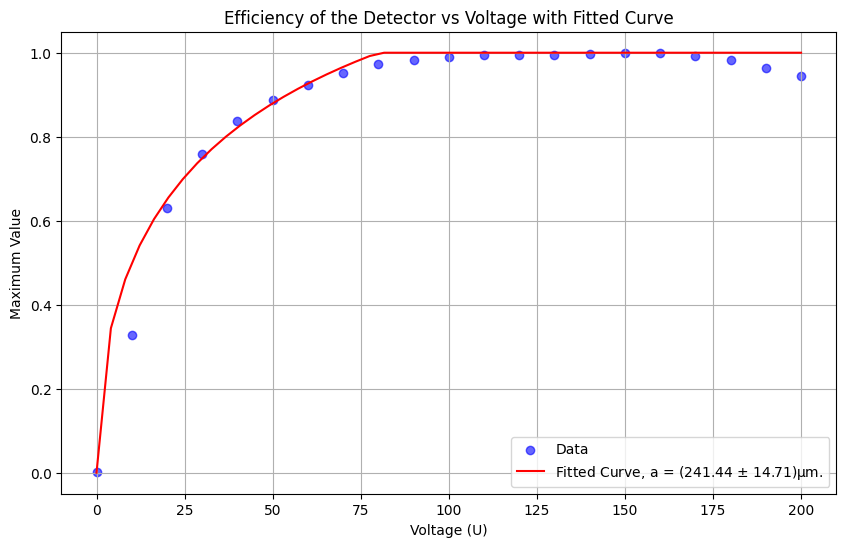

In [28]:
from scipy.optimize import curve_fit

# Define the CCE(U) function
def CCE(U, a):
    D = 80
    # Calculate dc(U)
    dc = np.where(U < D, 300 * np.sqrt(U /D), 300)
    # Calculate CCE(U)
    return (1 - np.exp(-dc / a)) / (1 - np.exp(-300 / a))

# Voltage data (U) and corresponding CCE values (normalized_sums)
# Replace `voltages` and `normalized_sums` with the actual data
U = np.array(voltages)
CCE_values = np.array(normalized_sums)

# Sort the data by voltage for easier fitting and subsetting
U_sorted_indices = np.argsort(U)
U_sorted = U[U_sorted_indices]
CCE_values_sorted = CCE_values[U_sorted_indices]

# Fit the function to the data using non-linear curve fitting
popt, pcov = curve_fit(CCE, U_sorted[2:8], CCE_values_sorted[2:8], p0=[74], bounds = [1, 500])  # Initial guess for a is 74

# Extract the estimated value of a
a_estimated = popt[0]

print(f"Estimated value of the penetration depth a is {a_estimated: .2f} µm.")

# Plot the data and the fitted curve
U_fit = np.linspace(min(U_sorted), max(U_sorted), 50)
CCE_fit = CCE(U_fit, a_estimated)

plt.figure(figsize=(10, 6))
plt.scatter(U_sorted, CCE_values_sorted, label="Data", color="blue", alpha=0.6)
plt.plot(U_fit, CCE_fit, color="red", alpha=1, label=f"Fitted Curve, a = ({a_estimated:.2f} $\pm$ {np.sqrt(pcov[0][0]):.2f})µm.")
plt.title("Efficiency of the Detector vs Voltage with Fitted Curve")
plt.xlabel("Voltage (U)")
plt.ylabel("Maximum Value")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Using a $\beta^-$ source  
In this section, we received the data where the voltage was increased from 0 to 200V in 10V steps and a dataset of 10000 events was recorded for each step.

#### a) Plot the mean cluster energy as a function of the applied voltage

In [29]:
import os

# Folder containing the files
source_folder = "source"

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=["File", "Average"])

# Iterate through all files in the folder
for file in os.listdir(source_folder):
    # Check if the file name starts with a number
    if file[0].isdigit():
        file_path = os.path.join(source_folder, file)
        with open(file_path, 'r') as f:
            lines = f.readlines()[1:]  # Skip the first line
            # Calculate the average of each line and store it in a list
            averages = [sum(map(float, line.split())) / len(line.split()) for line in lines]
            # Calculate the average of the averages
            overall_average = sum(averages) / len(averages)
            # Append the result to the dataframe
            results_df = pd.concat([results_df, pd.DataFrame({"File": [file], "Average": [overall_average]})], ignore_index=True)

/var/folders/1b/2klmrx_s0jl13t6zcmp2lt2m0000gn/T/ipykernel_3481/376555496.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({"File": [file], "Average": [overall_average]})], ignore_index=True)


In [30]:
# Extract voltage from file name
results_df["Voltage"] = results_df["File"].str.extract(r'(\d+)').astype(int)  

In [31]:
# Normalize the average values
results_df["Normalized Average"] = results_df["Average"] / results_df["Average"].max()  

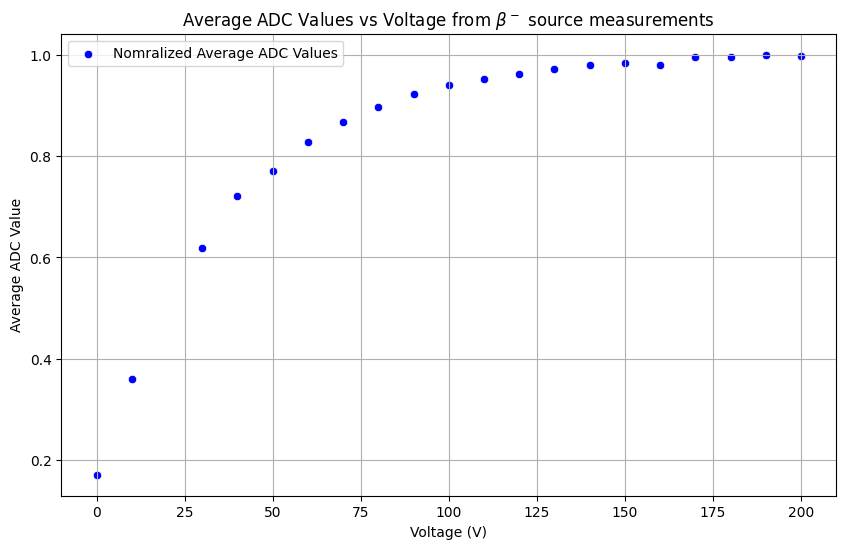

In [32]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x="Voltage", y="Normalized Average", color="blue", alpha=1, label="Nomralized Average ADC Values")
plt.title(r"Average ADC Values vs Voltage from $\beta^-$ source measurements")
plt.xlabel("Voltage (V)")
plt.ylabel("Average ADC Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()

#### b) Compare the results between the CCE measurement with a laser and a source. Why do they differ?

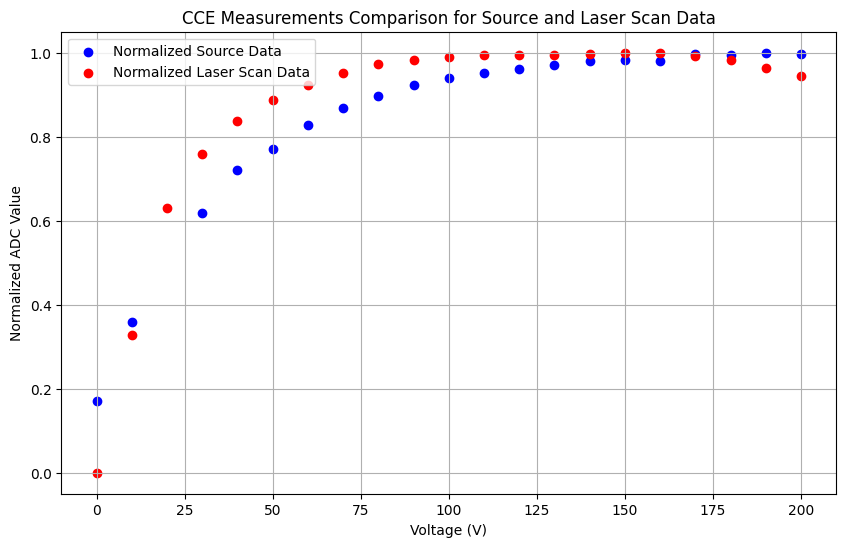

In [33]:
# Plot the source and laser scan data
plt.figure(figsize=(10,6))
plt.scatter(results_df["Voltage"], results_df["Normalized Average"], color="blue", alpha=1, label="Normalized Source Data")
plt.scatter(voltages, normalized_sums, color="red", alpha=1, label="Normalized Laser Scan Data")
plt.title("CCE Measurements Comparison for Source and Laser Scan Data")
plt.xlabel("Voltage (V)")
plt.ylabel("Normalized ADC Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()

There is still activity when there is no voltage, as the source is still emitting $\beta$ particles. Due to this, the influence of the bias voltage is lower, and thus the slope is smaller.

## 6.7 Large Source Scan  
We performed a $\textit{RS Run}$ for 1,000,000 events.

#### a) Represent the clusters per event and the channels per cluster in a meaningful way.

Cluster size means, 0 events where 0 channels were hit, 560k events where 1 channel was hit, etc.

Number of clusters means, 43777 events where 0 clusters were found, 875k events where 1 cluster was found, etc.

In [34]:
clusters_per_event = pd.read_csv("source/number_of_clusters.txt", sep="\t", header=None, names=["Count"], skiprows = 1)

In [35]:
clusters_per_event.head(10)

,Count
0,43777.0
1,875137.0
2,75273.0
3,2357.0
4,58.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


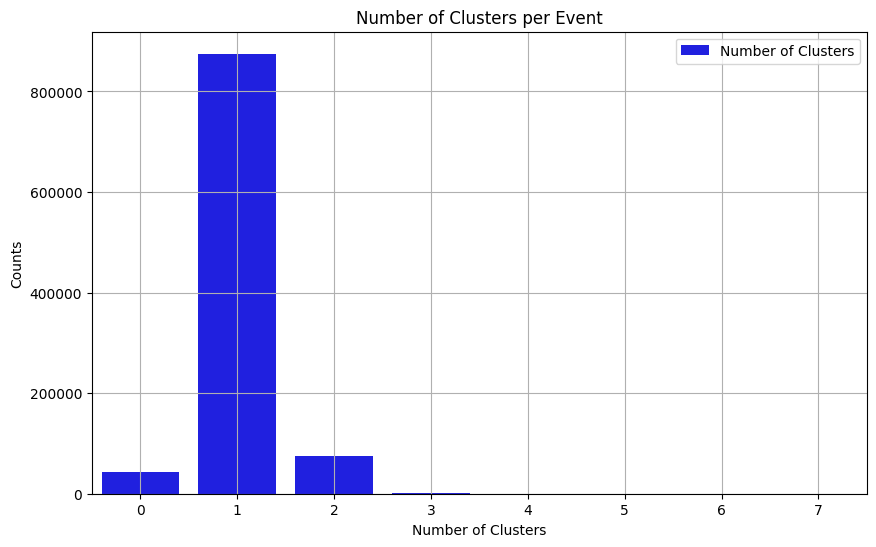

In [36]:
# When looking at number_of_clusters.txt and the DataFrame, we see that the counts 
# are nonzero only for the first 5 rows, so we drop the rest when plotting.
# Plot the Number of Clusters per Event
plt.figure(figsize=(10, 6))
sns.barplot(data=clusters_per_event.iloc[:8], x=clusters_per_event.index[:8], y="Count", color="blue", alpha=1, label="Number of Clusters")
plt.title("Number of Clusters per Event")
plt.xlabel("Number of Clusters")
plt.ylabel("Counts")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [37]:
channels_per_cluster = pd.read_csv("source/cluster_size.txt", sep="\t", header=None, names=["Counts"], skiprows = 1)

In [38]:
channels_per_cluster.head(20)

,Counts
0,0.0
1,562927.0
2,406888.0
3,47034.0
4,10298.0
5,3375.0
6,1364.0
7,566.0
8,262.0
9,137.0


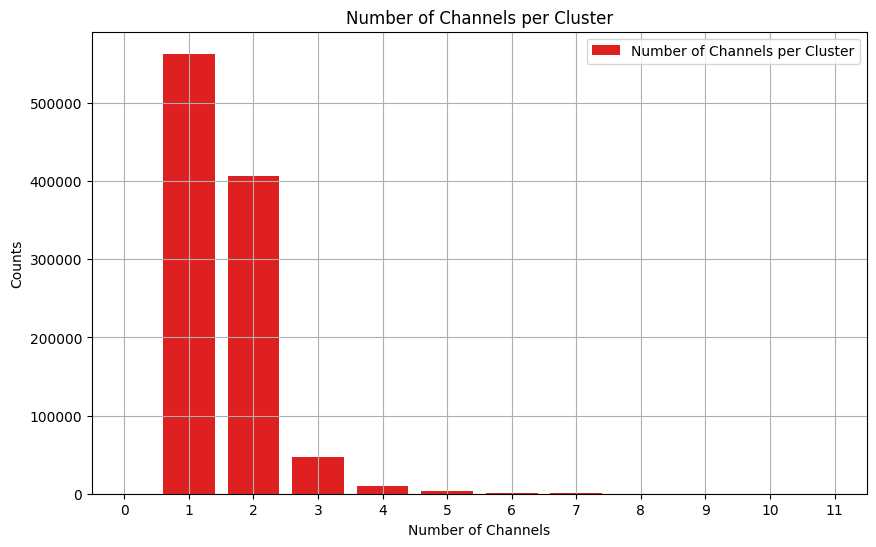

In [39]:
# When looking at number_of_clusters.txt and the DataFrame, we see that the counts 
# are nonzero only for the first 17 rows, so we drop the rest when plotting.
# Plot the Number of Clusters per Event
plt.figure(figsize=(10, 6))
sns.barplot(data=channels_per_cluster.iloc[:12], x=channels_per_cluster.index[:12], y="Counts", color="red", alpha=1, label="Number of Channels per Cluster")
plt.title("Number of Channels per Cluster")
plt.xlabel("Number of Channels")
plt.ylabel("Counts")
plt.legend(loc="upper right")
plt.grid()
plt.show()

#### b)

In [40]:
hitmap_data = pd.read_csv("source/hitmap.txt", header=None, names = ["Number of hits"], skiprows=1)

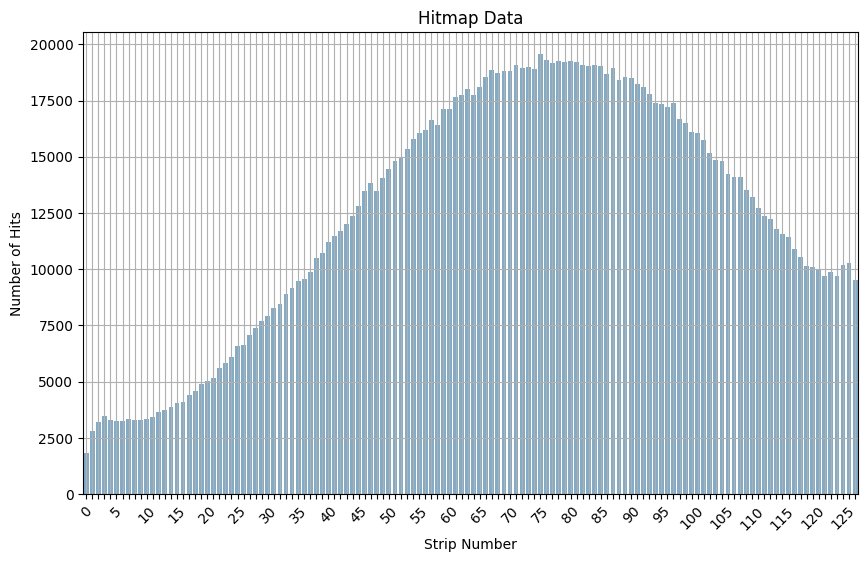

In [41]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=hitmap_data.index, y=hitmap_data["Number of hits"], alpha=0.6)
plt.title("Hitmap Data")
plt.xlabel("Strip Number")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility and avoid overlap
ax = plt.gca()
for label in ax.get_xaxis().get_ticklabels():
    if int(label.get_text()) % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.ylabel("Number of Hits")
plt.grid()
plt.show()

#### c + d) Plot the energy spectrum in ADC values and in keV.

In [42]:
# Read every line
with open("source/Cluster_adc_entries.txt", "r") as f:
    lines = f.read().splitlines()[1:]        # skip the first line

# Split on whitespace
rows = [ln.split() for ln in lines]

# Find the longest row
max_cols = max(len(r) for r in rows)

# Pad all rows to that length
padded = [r + [np.nan]*(max_cols - len(r)) for r in rows]

# Define the DataFrame 
cluster_adc_data = pd.DataFrame(padded, columns=[f"ADC{i+1}" for i in range(max_cols)]).astype(float)

In [43]:
# Take the sum for each cluster/row
sum_adc_data = cluster_adc_data.sum(axis=1)

Most probable value (MPV) is 79.02.
Mean value is 94.58.


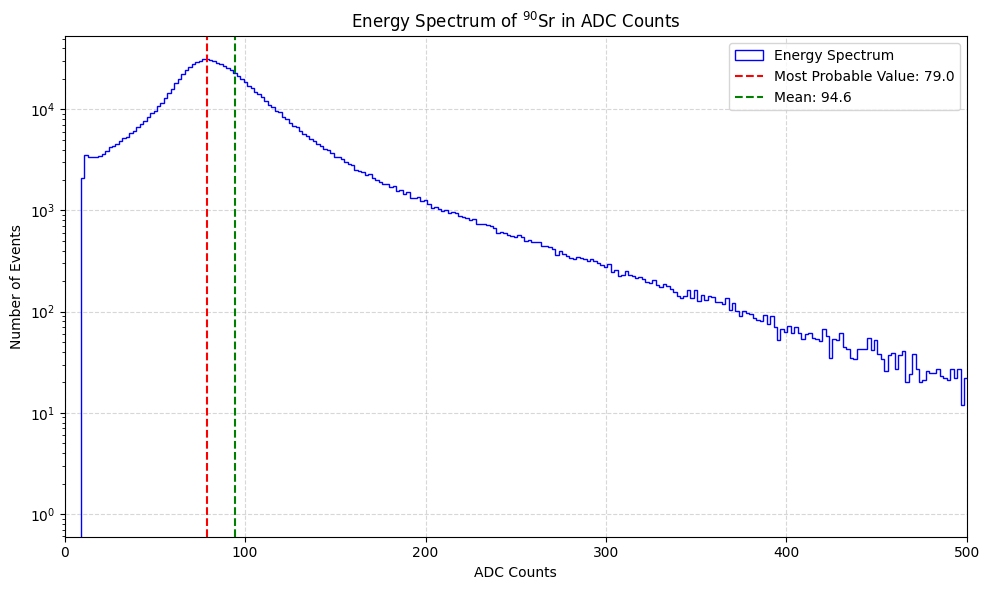

In [44]:
# Calculate the Most Probable Value (MPV) and the Mean
counts, bins = np.histogram(sum_adc_data, bins=500)
MPV = (bins[np.argmax(counts)] + bins[np.argmax(counts)+1]) / 2
mean = np.mean(sum_adc_data)

print(f"Most probable value (MPV) is {MPV:.2f}.")
print(f"Mean value is {mean:.2f}.")

# Plot the Energy Spectrum for the ADC Counts
plt.figure(figsize=(10, 6))
plt.hist(sum_adc_data, bins=500, color="blue", alpha=1, histtype="step", label="Energy Spectrum")
plt.title(r"Energy Spectrum of $^{90}\mathrm{Sr}$ in ADC Counts")
plt.xlabel("ADC Counts")
plt.axvline(MPV, color="red", linestyle="--", label=f"Most Probable Value: {MPV:.1f}")
plt.axvline(mean, color="green", linestyle="--", label=f"Mean: {mean:.1f}")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.xlim(0,500)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()

Now, to convert the ADC values to keV, we will use the coefficients from the calibration curve.

In [45]:
# Convert all entries in the cluster_adc_data DataFrame to charge using the fit

cluster_adc_data_charge = cluster_adc_data.copy()
for i in range(cluster_adc_data.shape[1]):
    cluster_adc_data_charge.iloc[:, i] = polyval(coeffs_mean_fit, cluster_adc_data.iloc[:, i])

# Take the sum for each cluster/row
sum_adc_data_charge = cluster_adc_data_charge.sum(axis=1)


In [46]:
# Calculate the energy in keV using the fit we made before to find the charge pairs and then convert to keV
# The conversion factor is 3.6 eV is needed to create one pair of charge carriers, so we multiply the values obtained by the fit by 3.6 eV and divide by 1e-3

energy_keV = (sum_adc_data_charge * 3.6) / 1e3

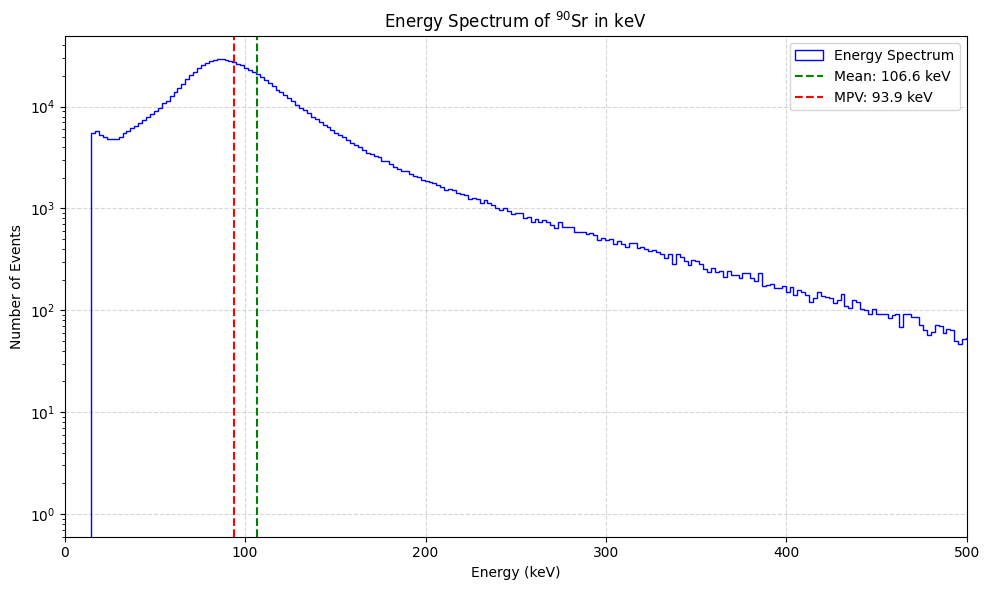

In [47]:
# Plot the Energy Spectrum in keV
plt.figure(figsize=(10, 6))
plt.hist(energy_keV, bins=500, color="blue", alpha=1, histtype="step", label="Energy Spectrum")
plt.title(r"Energy Spectrum of $^{90}\mathrm{Sr}$ in keV")
plt.xlabel("Energy (keV)")
plt.axvline(energy_keV.mean(), color="green", linestyle="--", label=f"Mean: {energy_keV.mean():.1f} keV")
plt.axvline(np.median(energy_keV), color="red", linestyle="--", label=f"MPV: {np.median(energy_keV):.1f} keV")
plt.xlim(0, 500)
plt.ylabel("Number of Events")
plt.yscale("log")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()

#### e) Interpret the mean value and evaluate the result.

This makes sense, since this is a thin tracking detector. The particle is in the great majority of cases not fully absorbed, which is why the observed mean energy of 106.6 keV is so much lower than both the average emission energy of 196 keV, as well as the maximum emission energy of 545.9 keV